# Analysis of Employee performance from 2019 to 2020
6 Metrics:

1. Aht (seconds/call)
2. Unplanned out (%)
3. Mean attrition (%)
4. Mean conformance (%)
5. Mean monthly system outage (hours)
6. Mean shrinkage (%)

# Load Data

In [414]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('wfh3.csv')
df.rename(columns={'ACTIVITY DATE': 'date', 'BUSINESS UNIT': 'bu'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['aht'] = df['TOTAL TIME - AHT (sec)'] / df['VOLUME - HANDLED']

df.head()

,date,bu,VOLUME - HANDLED,TOTAL TIME - AHT (sec),AHT CALC,Sum of PRODUCTIVE TIME - ACTUAL (hrs),Sum of PRODUCTIVE TIME - SCHEDULED (hrs),Conformance CALC,Attrition,EOM Headcount,Attrition % CALC,System Outage (hrs),Unplanned out,Shrinkage,Regular Scheduled Time (no OT),Unplanned out % CALC,Shrinkage % CALC,month,year,aht
0,2019-01-01,Client Transactions,290,0,0,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,0.000000
1,2019-01-01,Participant Transactions,429,0,0,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,0.000000
2,2019-01-01,RAM,1072,1315240,1226.902985,360.443889,507.5,0.710234264,0,0,NaN,0.0,0.0,115.25,656.25,0%,18%,January,2019,1226.902985
3,2019-01-01,RCS PHONES,0,0,#DIV/0!,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,NaN
4,2019-01-01,RIS,3,105,35,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,35.000000


# Join Attrition Monthly to daily performance

In [415]:
att = pd.read_csv('attrition_clean.csv', index_col=0)
att.rename(columns={'BUSINESS UNIT':'bu'}, inplace=True)
att[['bu','month','year','Attrition %']].head()

,bu,month,year,Attrition %
0,Client Transactions,January,2019,0.042553
1,Participant Transactions,January,2019,0.033898
2,RAM,January,2019,0.022472
3,RCS PHONES,January,2019,0.100000
4,RIS,January,2019,0.015873


In [416]:
df = df.merge(att, on=['bu', 'month', 'year'], how='left')

In [417]:
df = df[['date', 'month', 'year', 
         'bu', 'Conformance CALC', 'System Outage (hrs)', 
         'Unplanned out % CALC', 'Shrinkage % CALC', 'aht', 'Attrition %']]

In [418]:
df = df.rename(columns={'Conformance CALC': 'Conformance %', 
                  'Unplanned out % CALC':'Unplanned out %',
                  'Shrinkage % CALC':'Shrinkage %'})

# REMOVE WEEKENDS

In [419]:
df = df[~df['date'].dt.weekday.isin([5,6])]

# 1. AHT

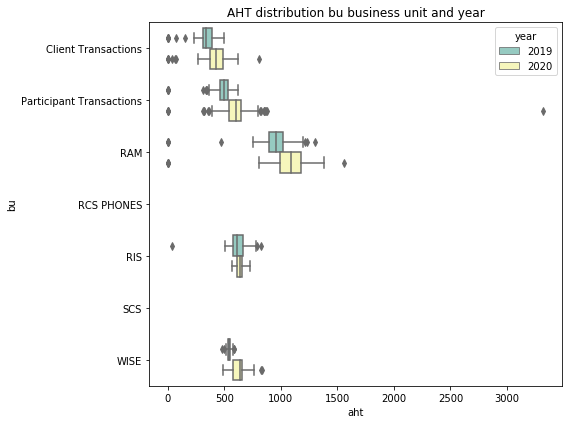

In [420]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="aht", y="bu", hue="year",
                 data=df, palette="Set3")
plt.title('AHT distribution bu business unit and year')
plt.tight_layout()

# 2. Unplanned Out (%)

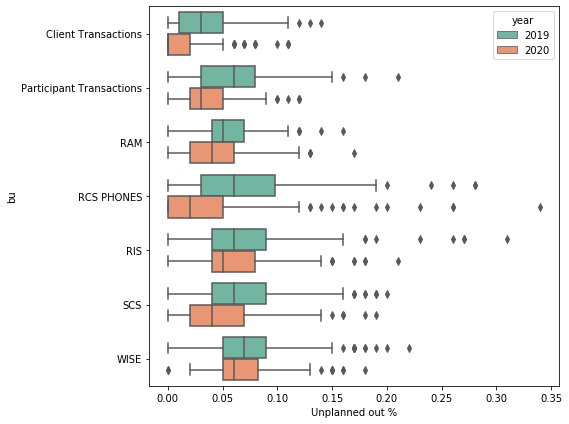

In [421]:
df.loc[:,'Unplanned out %'] = pd.to_numeric(df['Unplanned out %'].str.replace('%', ''), errors='coerce')/100

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Unplanned out %', y="bu", hue="year",
                 data=df, palette="Set2")
plt.tight_layout()

# 3. Mean attrition (%)

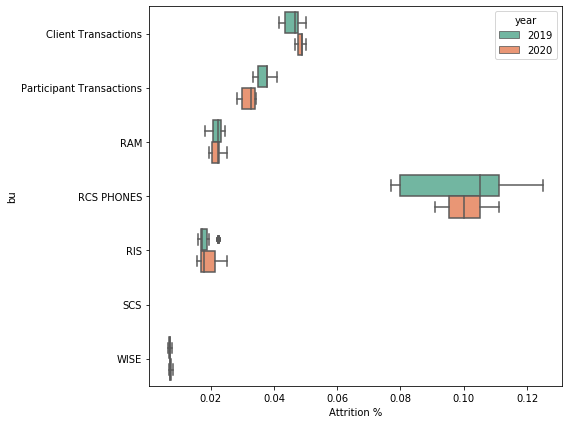

In [424]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Attrition %', y="bu", hue="year",
                 data=df, palette="Set2")
plt.tight_layout()

# 4. Mean conformance (%)

In [426]:
df['Conformance %'] = pd.to_numeric(df['Conformance %'].str.replace('%', ''), errors='coerce')
df['Conformance %'].describe()

count    2393.000000
mean        0.939399
std         0.063872
min         0.000000
25%         0.922599
50%         0.954189
75%         0.972888
max         1.130215
Name: Conformance %, dtype: float64

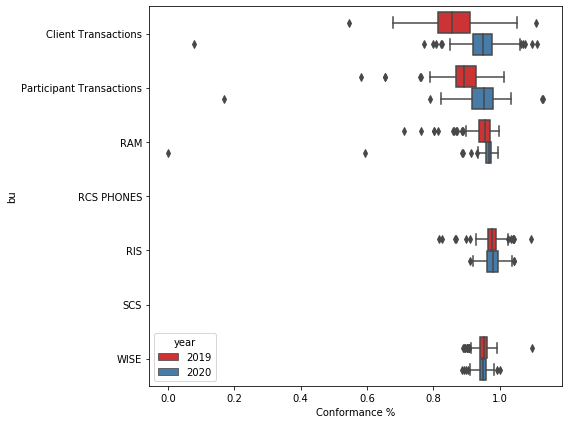

In [428]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Conformance %', y="bu", hue="year",
                 data=df, palette="Set1")
plt.tight_layout()

# 5. Mean monthly system outage (hours)

In [429]:
df['System Outage (hrs)'].describe()

count    3521.000000
mean        3.311465
std        14.553505
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       455.266667
Name: System Outage (hrs), dtype: float64

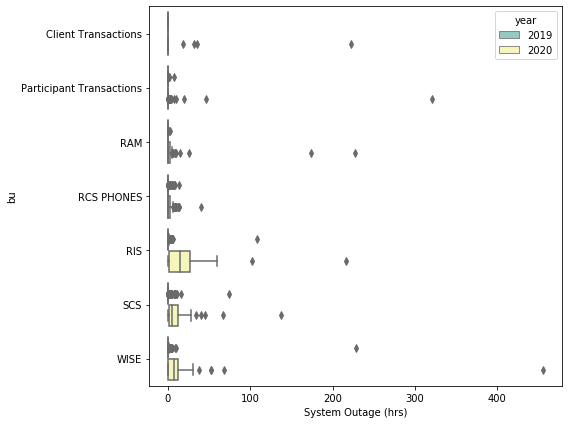

In [430]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='System Outage (hrs)', y="bu", hue="year",
                 data=df, palette="Set3")
plt.tight_layout()

# 6. Mean shrinkage (%)

In [431]:
df['Shrinkage %'] = pd.to_numeric(df['Shrinkage %'].str.replace('%', ''), errors='coerce')
df['Shrinkage %'].describe()

count    3371.000000
mean       32.334026
std         9.198082
min         6.000000
25%        26.000000
50%        31.000000
75%        37.000000
max       100.000000
Name: Shrinkage %, dtype: float64

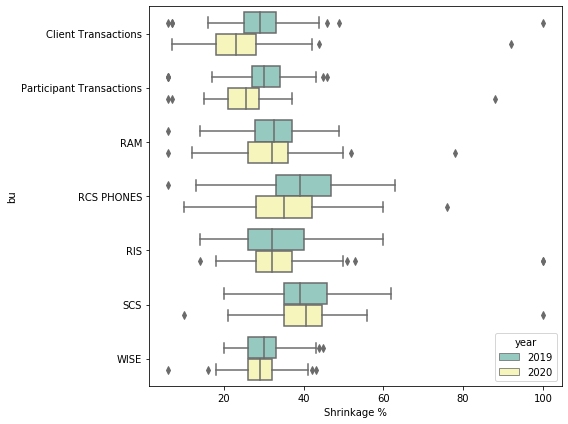

In [433]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Shrinkage %', y="bu", hue="year",
                 data=df, palette="Set3")
plt.tight_layout()

In [435]:
df.to_csv('wfh3_noweekends_clean.csv', index=False)

In [436]:
df

,date,month,year,bu,Conformance %,System Outage (hrs),Unplanned out %,Shrinkage %,aht,Attrition %
0,2019-01-01,January,2019,Client Transactions,NaN,0.0,NaN,NaN,0.000000,0.042553
1,2019-01-01,January,2019,Participant Transactions,NaN,0.0,NaN,NaN,0.000000,0.033898
2,2019-01-01,January,2019,RAM,0.710234,0.0,0.0,18.0,1226.902985,0.022472
3,2019-01-01,January,2019,RCS PHONES,NaN,0.0,NaN,NaN,NaN,0.100000
4,2019-01-01,January,2019,RIS,NaN,0.0,NaN,NaN,35.000000,0.015873
...,...,...,...,...,...,...,...,...,...,...
4916,2020-12-03,December,2020,RAM,NaN,0.0,NaN,NaN,NaN,NaN
4917,2020-12-03,December,2020,RCS PHONES,NaN,0.0,NaN,NaN,NaN,NaN
4918,2020-12-03,December,2020,RIS,NaN,0.0,NaN,NaN,NaN,NaN
4919,2020-12-03,December,2020,SCS,NaN,0.0,NaN,NaN,NaN,NaN
